In [32]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import seaborn as sns
from typing import List

In [33]:
regression_df = pd.read_csv('./data/regression_cleaned.csv')

#### Analyze

In [34]:
corr_matrix = regression_df.corr()

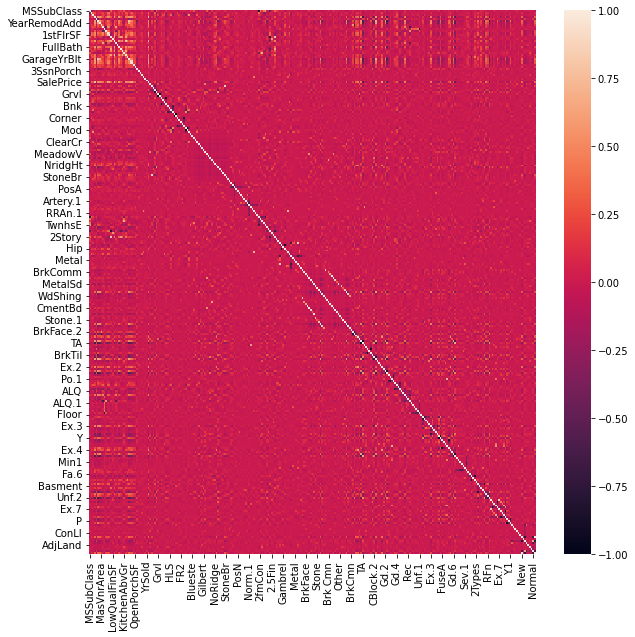

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix)
plt.show()

In [28]:
def data_to_train_test(data: pd.DataFrame, y_name:str, **kwargs):
    data_copy = data.copy()

    y = data_copy.pop(y_name)
    X = data_copy
    
    return train_test_split(X, y, **kwargs)

In [29]:
X_train, X_test, y_train, y_test = data_to_train_test(data=regression_df, y_name='SalePrice', test_size=0.2, random_state=42)

In [30]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
1061,50,79.000000,9492,5,5,1941,1950,0.0,368,41,...,0,0,0,1,0,0,0,0,1,0
1142,60,85.000000,10574,8,5,2005,2006,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
793,60,70.000000,8400,8,6,2001,2001,0.0,643,0,...,0,0,0,1,0,0,0,0,1,0
724,20,80.000000,9920,5,5,1954,1954,110.0,354,290,...,0,0,0,1,0,0,0,0,1,0
374,120,70.077889,4500,6,5,1999,1999,425.0,883,0,...,0,0,0,1,0,0,0,0,1,0


In [31]:
def train_model(X_train, y_train, clf, **kwargs):
    return clf.fit(X=X_train, y=y_train, **kwargs)

In [66]:
min_depth = 4
max_depth = 20
best_clf = None
best_predictions = None

for depth in range(min_depth, max_depth):
    clf = RandomForestRegressor(n_estimators=100, max_depth=depth, criterion="squared_error", random_state=42)
    clf.fit(X_train, y_train)
    
    predictions = clf.predict(X_test)
    
    if not best_clf:
        best_clf = clf
        best_predictions = predictions
        continue
    
    if mean_squared_error(y_test, predictions) < mean_squared_error(y_test, best_predictions):
         best_clf = clf
         best_predictions = predictions
   

In [69]:
print(type(best_clf))
print(best_predictions)

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
[182938.01333333 142117.24974359 309339.43       302145.58
 234153.53       126463.18640077 170584.21880952 129546.23040936
 170846.82       137917.26388889 125055.73145424 139960.65666667
 216236.13222222 155949.22222222 161776.15263158 147739.06
 205116.47       185487.17272727 187164.15       122673.65066667
 217008.66       177622.30010823 126283.25662539 157879.53379121
 178353.06       259866.91       134722.78857143  90289.
 193874.02444444 128258.06666667 114965.56748599 146323.24329205
 119492.27469442 141759.92       134252.34       142622.38888889
  93756.45       136541.75       142387.76       100275.29606061
 241482.96555556 126652.36288515 189133.8552381  153517.814
  78715.26       130689.35272727 135136.42307692 108601.14622969
 161582.04       143362.4357085  113735.74487469 137215.12
 176533.86418038 149974.08474359 271115.93       122817.29944444
 115472.56029196 106268.59333333 360296.07       188744.03533333

In [111]:
importances = best_clf.feature_importances_
names = regression_df.columns.drop('SalePrice')
std = np.std([tree.feature_importances_ for tree in best_clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=names)

OverallQual    0.535428
GrLivArea      0.117921
2ndFlrSF       0.044784
1stFlrSF       0.034891
TotalBsmtSF    0.030299
BsmtFinSF1     0.027875
GarageCars     0.024235
LotArea        0.017243
GarageArea     0.016482
FullBath       0.014050
dtype: float64


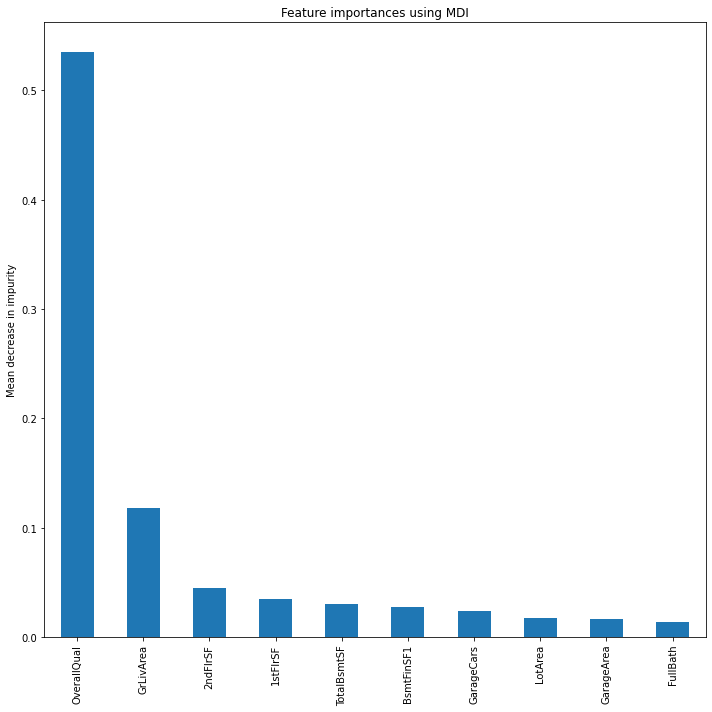

In [121]:
highest_importances = forest_importances.sort_values(ascending=False)[:10]
print(highest_importances)
fig, ax = plt.subplots(figsize=(10,10))
highest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()